In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.6 MB/s eta 0:00:00


In [ ]:
%%capture

!pip install datasets
!pip install transformers
!pip install GPUtil


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00


In [ ]:
import torch
import shap
import datasets
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, AutoTokenizer
from transformers import TextClassificationPipeline
from GPUtil import showUtilization as gpu_usage
import pandas as pd
import numpy as np
import tqdm
import sys, os

ModuleNotFoundError: ignored

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
torch.cuda.empty_cache()
gpu_usage()  

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
cuda:0


## Load in files containing training data

In [ ]:

df_en = pd.read_csv('/content/drive/MyDrive/final data and shapley values/english_test_4-14.csv')
SELECTED_DF = df_en
df = datasets.Dataset.from_pandas(SELECTED_DF)

## Load pretrained models you want to explain

In [ ]:
# import a roberta model (finetuned for regression)
model_name = '/content/drive/MyDrive/testing_politeness_models/english/english_model'
tok_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(tok_name)


model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1, problem_type="regression")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

## Create Pipeline and SHAP Explainer Object

In [ ]:
# instantiate a huggingface transformer pipeline object
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}
ppl = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=0, function_to_apply="none",**tokenizer_kwargs)
# instantiate a explainer object based on the pipeline
explainer = shap.Explainer(ppl, **tokenizer_kwargs)
# get shap values for dataset
shap_values_en = explainer(df["Utterance"])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   0%|          | 2/570 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|          | 4/570 [00:17<25:14,  2.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|          | 5/570 [00:23<38:30,  4.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|          | 6/570 [00:29<45:55,  4.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|          | 7/570 [00:35<46:47,  4.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|▏         | 8/570 [00:42<53:05,  5.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 9/570 [00:47<51:56,  5.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 10/570 [00:53<52:27,  5.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 11/570 [00:59<55:10,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 12/570 [01:05<53:24,  5.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 13/570 [01:11<56:16,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   2%|▏         | 14/570 [01:17<53:49,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 15/570 [01:22<52:48,  5.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 16/570 [01:30<59:31,  6.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 17/570 [01:36<57:07,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 18/570 [01:41<54:42,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   3%|▎         | 19/570 [01:48<56:58,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▎         | 20/570 [01:53<54:08,  5.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▎         | 21/570 [02:00<55:22,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 22/570 [02:05<54:38,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 23/570 [02:11<52:52,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 24/570 [02:18<55:54,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|▍         | 25/570 [02:23<53:26,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▍         | 26/570 [02:29<54:00,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▍         | 27/570 [02:35<54:19,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▍         | 28/570 [02:41<52:32,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 29/570 [02:48<55:23,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 30/570 [02:53<52:52,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 31/570 [02:59<52:29,  5.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 32/570 [03:05<53:34,  5.98s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 33/570 [03:10<51:10,  5.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 34/570 [03:17<54:41,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 35/570 [03:22<52:06,  5.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▋         | 36/570 [03:28<51:13,  5.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▋         | 37/570 [03:35<53:42,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 38/570 [03:40<51:33,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 39/570 [03:46<53:30,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 40/570 [03:52<52:03,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 41/570 [03:57<50:10,  5.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|▋         | 42/570 [04:04<53:10,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 43/570 [04:09<50:41,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 44/570 [04:15<51:17,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 45/570 [04:21<51:53,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 46/570 [04:26<49:51,  5.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 47/570 [04:33<53:06,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   8%|▊         | 48/570 [04:39<50:51,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▊         | 49/570 [04:45<51:02,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 50/570 [04:51<52:02,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 51/570 [04:57<52:50,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 52/570 [05:05<56:53,  6.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 53/570 [05:10<53:23,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|▉         | 54/570 [05:16<52:39,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|▉         | 55/570 [05:22<52:41,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|▉         | 56/570 [05:28<50:20,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 57/570 [05:35<53:05,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 58/570 [05:40<50:48,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|█         | 59/570 [05:46<50:43,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 60/570 [05:52<51:35,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 61/570 [05:58<49:17,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 62/570 [06:05<52:16,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 63/570 [06:10<49:59,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█         | 64/570 [06:16<49:24,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  11%|█▏        | 65/570 [06:22<51:22,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 66/570 [06:28<49:18,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 67/570 [06:35<51:48,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 68/570 [06:40<49:37,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 69/570 [06:45<48:16,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 70/570 [06:52<50:24,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█▏        | 71/570 [06:57<48:08,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 72/570 [07:03<49:19,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 73/570 [07:09<48:59,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 74/570 [07:14<47:00,  5.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 75/570 [07:21<49:53,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|█▎        | 76/570 [07:27<47:47,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▎        | 77/570 [07:33<48:18,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▎        | 78/570 [07:39<49:24,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 79/570 [07:44<47:33,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 80/570 [07:51<50:19,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 81/570 [07:57<48:04,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  14%|█▍        | 82/570 [08:02<47:45,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▍        | 83/570 [08:09<48:55,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▍        | 84/570 [08:14<46:50,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▍        | 85/570 [08:21<49:33,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 86/570 [08:26<47:13,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 87/570 [08:33<50:28,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 88/570 [08:40<51:36,  6.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 89/570 [08:45<48:44,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 90/570 [08:52<50:38,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 91/570 [08:58<48:01,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▌        | 92/570 [09:03<46:47,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▋        | 93/570 [09:10<48:17,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█▋        | 94/570 [09:15<46:22,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 95/570 [09:22<48:17,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 96/570 [09:27<47:15,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 97/570 [09:33<45:38,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 98/570 [09:40<48:24,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 99/570 [09:45<46:08,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 100/570 [09:51<46:50,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 101/570 [09:57<46:52,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 102/570 [10:03<45:01,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 103/570 [10:10<47:49,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 104/570 [10:15<45:36,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|█▊        | 105/570 [10:21<45:51,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▊        | 106/570 [10:27<46:32,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 107/570 [10:32<44:38,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 108/570 [10:39<47:00,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 109/570 [10:44<44:42,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 110/570 [10:50<44:19,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█▉        | 111/570 [10:57<46:05,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|█▉        | 112/570 [11:02<44:11,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|█▉        | 113/570 [11:09<46:39,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 114/570 [11:14<44:53,  5.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 115/570 [11:19<43:24,  5.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 116/570 [11:26<45:43,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 117/570 [11:31<43:45,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 118/570 [11:38<45:04,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 119/570 [11:44<44:51,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 120/570 [11:49<43:02,  5.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██        | 121/570 [11:56<45:56,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██▏       | 122/570 [12:01<43:51,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 123/570 [12:09<48:28,  6.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 124/570 [12:16<47:39,  6.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 125/570 [12:21<44:51,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 126/570 [12:28<46:42,  6.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 127/570 [12:33<44:23,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|██▏       | 128/570 [12:39<44:05,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 129/570 [12:45<44:32,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 130/570 [12:51<43:04,  5.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 131/570 [12:57<45:16,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 132/570 [13:03<43:15,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  23%|██▎       | 133/570 [13:09<42:52,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▎       | 134/570 [13:15<43:39,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▎       | 135/570 [13:20<42:07,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 136/570 [13:27<44:48,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 137/570 [13:33<43:00,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 138/570 [13:38<42:29,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██▍       | 139/570 [13:45<43:45,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▍       | 140/570 [13:50<41:48,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▍       | 141/570 [13:57<43:39,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▍       | 142/570 [14:02<42:07,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 143/570 [14:08<40:42,  5.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 144/570 [14:15<43:14,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 145/570 [14:20<41:28,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▌       | 146/570 [14:26<42:38,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▌       | 147/570 [14:32<42:18,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▌       | 148/570 [14:38<40:35,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▌       | 149/570 [14:44<42:44,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▋       | 150/570 [14:50<40:45,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  26%|██▋       | 151/570 [14:56<41:18,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 152/570 [15:02<41:46,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 153/570 [15:07<40:10,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 154/570 [15:14<42:31,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 155/570 [15:19<40:24,  5.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|██▋       | 156/570 [15:25<40:40,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 157/570 [15:32<41:38,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 158/570 [15:38<42:25,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 159/570 [15:46<45:20,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 160/570 [15:51<42:23,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 161/570 [15:57<41:59,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██▊       | 162/570 [16:03<42:05,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▊       | 163/570 [16:09<39:42,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 164/570 [16:15<41:38,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 165/570 [16:21<39:44,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 166/570 [16:26<39:17,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 167/570 [16:33<40:45,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  29%|██▉       | 168/570 [16:38<39:04,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|██▉       | 169/570 [16:45<41:09,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|██▉       | 170/570 [16:50<39:12,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 171/570 [16:56<38:01,  5.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 172/570 [17:03<40:22,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 173/570 [17:08<38:44,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 174/570 [17:14<39:44,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 175/570 [17:20<39:18,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 176/570 [17:26<37:59,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 177/570 [17:33<40:27,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███       | 178/570 [17:38<38:39,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|███▏      | 179/570 [17:44<38:42,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 180/570 [17:50<38:49,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 181/570 [17:55<37:13,  5.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 182/570 [18:02<39:41,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 183/570 [18:08<37:54,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 184/570 [18:13<37:37,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  32%|███▏      | 185/570 [18:20<38:50,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 186/570 [18:25<37:16,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 187/570 [18:32<39:36,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 188/570 [18:38<37:57,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 189/570 [18:43<36:58,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 190/570 [18:50<38:25,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▎      | 191/570 [18:55<36:49,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▎      | 192/570 [19:02<38:22,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 193/570 [19:08<39:13,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 194/570 [19:15<39:46,  6.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 195/570 [19:21<39:25,  6.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|███▍      | 196/570 [19:26<37:11,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▍      | 197/570 [19:33<38:58,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▍      | 198/570 [19:39<37:00,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▍      | 199/570 [19:44<36:26,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 200/570 [19:51<37:27,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 201/570 [19:56<35:40,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 202/570 [20:03<37:33,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▌      | 203/570 [20:08<35:56,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▌      | 204/570 [20:14<35:00,  5.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▌      | 205/570 [20:20<36:47,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▌      | 206/570 [20:26<35:34,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▋      | 207/570 [20:32<36:33,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███▋      | 208/570 [20:38<36:01,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 209/570 [20:43<34:44,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 210/570 [20:50<36:37,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 211/570 [20:55<34:51,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|███▋      | 212/570 [21:02<35:27,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 214/570 [21:12<33:14,  5.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 215/570 [21:19<35:29,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 216/570 [21:25<34:02,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 217/570 [21:30<33:43,  5.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 218/570 [21:37<35:16,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  38%|███▊      | 219/570 [21:42<33:59,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▊      | 220/570 [21:49<35:50,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 221/570 [21:54<34:06,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 222/570 [22:00<33:20,  5.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 223/570 [22:07<35:07,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 224/570 [22:12<33:49,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███▉      | 225/570 [22:18<34:36,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|███▉      | 226/570 [22:24<34:22,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|███▉      | 227/570 [22:30<33:06,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 228/570 [22:37<35:10,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 229/570 [22:44<36:24,  6.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 231/570 [22:56<34:34,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 232/570 [23:01<33:23,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 233/570 [23:08<34:44,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 234/570 [23:13<33:10,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████      | 235/570 [23:20<33:47,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  41%|████▏     | 236/570 [23:25<33:15,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 237/570 [23:31<32:09,  5.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 238/570 [23:38<33:56,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 239/570 [23:43<32:27,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 240/570 [23:49<32:33,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 241/570 [23:55<32:56,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|████▏     | 242/570 [24:01<31:41,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 243/570 [24:08<33:45,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 244/570 [24:13<32:17,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 245/570 [24:19<32:06,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 246/570 [24:25<32:37,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████▎     | 247/570 [24:31<31:19,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▎     | 248/570 [24:38<33:11,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▎     | 249/570 [24:43<31:31,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 250/570 [24:48<30:46,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 251/570 [24:55<32:06,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 252/570 [25:00<30:35,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  44%|████▍     | 253/570 [25:07<31:46,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▍     | 254/570 [25:13<31:20,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▍     | 255/570 [25:18<30:11,  5.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▍     | 256/570 [25:25<32:04,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 257/570 [25:30<30:31,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 258/570 [25:37<31:27,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 259/570 [25:43<31:21,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 260/570 [25:48<30:02,  5.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 261/570 [25:55<31:31,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 262/570 [26:00<29:54,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▌     | 263/570 [26:06<30:05,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▋     | 264/570 [26:12<31:10,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|████▋     | 265/570 [26:19<31:54,  6.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 266/570 [26:26<32:33,  6.43s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 267/570 [26:31<30:40,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 268/570 [26:38<31:02,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 269/570 [26:43<30:37,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  47%|████▋     | 270/570 [26:49<29:18,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 271/570 [26:56<30:45,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 272/570 [27:01<29:11,  5.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 273/570 [27:07<29:31,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 274/570 [27:14<30:49,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 275/570 [27:19<29:29,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|████▊     | 276/570 [27:26<30:59,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▊     | 277/570 [27:32<29:49,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 278/570 [27:39<30:15,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 279/570 [27:45<30:52,  6.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 280/570 [27:51<30:09,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 281/570 [27:58<30:57,  6.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|████▉     | 282/570 [28:03<29:11,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|████▉     | 283/570 [28:10<29:33,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|████▉     | 284/570 [28:16<28:57,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 285/570 [28:21<27:44,  5.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 286/570 [28:28<29:10,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 287/570 [28:33<27:53,  5.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 288/570 [28:39<28:14,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 289/570 [28:46<28:35,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 290/570 [28:51<27:18,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 291/570 [28:58<28:48,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████     | 292/570 [29:03<27:27,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|█████▏    | 293/570 [29:09<27:43,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 294/570 [29:16<28:04,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 295/570 [29:21<26:51,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 296/570 [29:28<28:30,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 297/570 [29:33<27:05,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 298/570 [29:39<27:01,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████▏    | 299/570 [29:46<27:58,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 300/570 [29:53<28:30,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 301/570 [30:00<29:12,  6.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 302/570 [30:05<27:29,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 303/570 [30:11<27:31,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  53%|█████▎    | 304/570 [30:17<27:18,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▎    | 305/570 [30:23<26:10,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▎    | 306/570 [30:30<27:34,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▍    | 307/570 [30:35<26:21,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▍    | 308/570 [30:42<26:30,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▍    | 309/570 [30:48<26:40,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|█████▍    | 310/570 [30:53<25:21,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▍    | 311/570 [31:00<26:38,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▍    | 312/570 [31:07<27:12,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▍    | 313/570 [31:13<27:22,  6.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 314/570 [31:19<26:15,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 315/570 [31:24<25:03,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 316/570 [31:31<26:07,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 317/570 [31:36<24:58,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 318/570 [31:43<25:25,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 319/570 [31:49<25:19,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▌    | 320/570 [31:54<24:21,  5.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▋    | 321/570 [32:01<25:43,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  56%|█████▋    | 322/570 [32:06<24:27,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 323/570 [32:12<24:30,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 324/570 [32:18<24:43,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 325/570 [32:24<23:40,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 326/570 [32:31<24:51,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|█████▋    | 327/570 [32:36<23:44,  5.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 328/570 [32:41<23:17,  5.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 329/570 [32:48<24:09,  6.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 330/570 [32:53<23:16,  5.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 331/570 [33:00<24:34,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 332/570 [33:06<23:22,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|█████▊    | 333/570 [33:11<22:44,  5.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▊    | 334/570 [33:18<23:58,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 335/570 [33:25<24:54,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 336/570 [33:32<25:38,  6.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 337/570 [33:37<24:05,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 338/570 [33:43<23:41,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  59%|█████▉    | 339/570 [33:50<23:55,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|█████▉    | 340/570 [33:55<22:36,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|█████▉    | 341/570 [34:02<23:45,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 342/570 [34:07<22:38,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 343/570 [34:13<21:57,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 344/570 [34:19<22:50,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 345/570 [34:24<21:38,  5.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 346/570 [34:31<22:25,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 347/570 [34:37<22:38,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 348/570 [34:43<21:52,  5.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████    | 349/570 [34:50<22:50,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|██████▏   | 350/570 [34:55<21:42,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 351/570 [35:01<22:00,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 352/570 [35:07<21:48,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 353/570 [35:12<20:58,  5.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 354/570 [35:19<22:15,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 355/570 [35:25<21:13,  5.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  62%|██████▏   | 356/570 [35:31<21:11,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 357/570 [35:37<21:23,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 358/570 [35:42<20:35,  5.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 359/570 [35:49<21:42,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 360/570 [35:55<20:48,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|██████▎   | 361/570 [36:01<20:39,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▎   | 362/570 [36:07<21:03,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▎   | 363/570 [36:13<20:18,  5.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 364/570 [36:20<21:28,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 365/570 [36:25<20:30,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 366/570 [36:31<20:18,  5.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|██████▍   | 367/570 [36:37<20:45,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▍   | 368/570 [36:43<20:00,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▍   | 369/570 [36:50<21:06,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▍   | 370/570 [36:56<20:21,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 371/570 [37:04<22:15,  6.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 372/570 [37:10<21:30,  6.52s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 373/570 [37:15<20:24,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 374/570 [37:23<21:13,  6.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 375/570 [37:28<20:04,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 376/570 [37:34<20:05,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▌   | 377/570 [37:40<19:52,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▋   | 378/570 [37:46<19:22,  6.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|██████▋   | 379/570 [37:53<20:21,  6.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 380/570 [38:01<21:13,  6.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 381/570 [38:08<21:26,  6.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 382/570 [38:13<19:56,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 383/570 [38:19<19:29,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 384/570 [38:26<19:43,  6.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 385/570 [38:31<18:44,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 386/570 [38:38<19:40,  6.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 387/570 [38:44<18:47,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 388/570 [38:50<18:34,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 389/570 [38:56<18:44,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  68%|██████▊   | 390/570 [39:02<17:56,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▊   | 391/570 [39:09<18:51,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 392/570 [39:14<18:00,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 393/570 [39:20<17:49,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 394/570 [39:27<18:03,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 395/570 [39:32<17:12,  5.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████▉   | 396/570 [39:39<18:05,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|██████▉   | 397/570 [39:45<17:23,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|██████▉   | 398/570 [39:51<17:05,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 399/570 [39:57<17:42,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 400/570 [40:03<16:55,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 401/570 [40:10<17:45,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 402/570 [40:15<16:48,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 403/570 [40:21<16:30,  5.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 404/570 [40:28<17:05,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 405/570 [40:34<17:11,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 406/570 [40:42<18:20,  6.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  71%|███████▏  | 407/570 [40:47<17:13,  6.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 408/570 [40:54<17:11,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 409/570 [41:00<17:08,  6.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 410/570 [41:06<16:20,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 411/570 [41:13<17:04,  6.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 412/570 [41:18<16:14,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|███████▏  | 413/570 [41:25<16:27,  6.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 414/570 [41:31<16:13,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 415/570 [41:37<15:29,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 416/570 [41:44<16:23,  6.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 417/570 [41:49<15:37,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 418/570 [41:56<15:49,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▎  | 419/570 [42:02<15:32,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▎  | 420/570 [42:07<14:57,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 421/570 [42:15<15:46,  6.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 422/570 [42:20<15:03,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 423/570 [42:27<15:31,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  74%|███████▍  | 424/570 [42:33<15:08,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▍  | 425/570 [42:39<14:38,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▍  | 426/570 [42:46<15:15,  6.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▍  | 427/570 [42:51<14:33,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 428/570 [42:58<15:03,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 429/570 [43:04<14:29,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 430/570 [43:10<13:59,  5.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 431/570 [43:16<14:32,  6.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 432/570 [43:22<13:49,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 433/570 [43:28<14:07,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▌  | 434/570 [43:35<13:58,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▋  | 435/570 [43:40<13:29,  6.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|███████▋  | 436/570 [43:47<14:11,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 437/570 [43:53<13:35,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 438/570 [44:00<14:00,  6.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 439/570 [44:06<13:34,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 440/570 [44:14<14:36,  6.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  77%|███████▋  | 441/570 [44:20<14:18,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 442/570 [44:26<13:28,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 443/570 [44:33<13:55,  6.58s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 444/570 [44:38<13:09,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 445/570 [44:45<12:55,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 446/570 [44:51<12:54,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|███████▊  | 447/570 [44:56<12:15,  5.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▊  | 448/570 [45:03<12:53,  6.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 449/570 [45:09<12:16,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 450/570 [45:15<12:23,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 451/570 [45:22<12:30,  6.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 452/570 [45:27<11:58,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|███████▉  | 453/570 [45:35<12:34,  6.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|███████▉  | 454/570 [45:40<12:00,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|███████▉  | 455/570 [45:47<12:08,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 456/570 [45:53<12:00,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 457/570 [45:59<11:28,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 458/570 [46:06<12:00,  6.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 459/570 [46:12<11:23,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 460/570 [46:18<11:36,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 461/570 [46:24<11:21,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 462/570 [46:30<11:02,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████  | 463/570 [46:37<11:25,  6.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|████████▏ | 464/570 [46:43<10:53,  6.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 465/570 [46:50<11:20,  6.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 466/570 [46:56<10:53,  6.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 467/570 [47:02<10:32,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 468/570 [47:09<10:51,  6.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 469/570 [47:14<10:23,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|████████▏ | 470/570 [47:22<10:47,  6.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 471/570 [47:27<10:15,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 472/570 [47:33<10:09,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 473/570 [47:40<10:22,  6.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 474/570 [47:46<09:52,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 475/570 [47:53<10:18,  6.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▎ | 476/570 [47:59<09:43,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▎ | 477/570 [48:05<09:40,  6.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 478/570 [48:14<10:44,  7.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 479/570 [48:19<09:57,  6.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 480/570 [48:27<10:09,  6.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|████████▍ | 481/570 [48:32<09:32,  6.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▍ | 482/570 [48:39<09:42,  6.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▍ | 483/570 [48:45<09:18,  6.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▍ | 484/570 [48:51<08:58,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 485/570 [48:58<09:16,  6.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 486/570 [49:04<08:45,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 487/570 [49:11<08:58,  6.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 488/570 [49:17<08:38,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 489/570 [49:23<08:24,  6.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 490/570 [49:30<08:38,  6.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▌ | 491/570 [49:36<08:14,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▋ | 492/570 [49:43<08:37,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  86%|████████▋ | 493/570 [49:49<08:07,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 494/570 [49:55<07:53,  6.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 495/570 [50:02<08:00,  6.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 496/570 [50:07<07:35,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 497/570 [50:15<07:54,  6.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 498/570 [50:20<07:26,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 499/570 [50:26<07:21,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 500/570 [50:33<07:25,  6.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 501/570 [50:39<07:04,  6.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 502/570 [50:46<07:19,  6.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 503/570 [50:51<06:54,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 504/570 [50:58<06:50,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▊ | 505/570 [51:04<06:50,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 506/570 [51:10<06:32,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 507/570 [51:17<06:47,  6.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 508/570 [51:23<06:20,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 509/570 [51:29<06:18,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  89%|████████▉ | 510/570 [51:35<06:14,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|████████▉ | 511/570 [51:41<05:57,  6.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|████████▉ | 512/570 [51:49<06:24,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 513/570 [51:55<06:13,  6.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 514/570 [52:02<06:16,  6.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 515/570 [52:08<05:51,  6.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 516/570 [52:14<05:40,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 517/570 [52:21<05:40,  6.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 518/570 [52:27<05:23,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 519/570 [52:34<05:33,  6.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████ | 520/570 [52:39<05:13,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|█████████▏| 521/570 [52:46<05:08,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 522/570 [52:52<05:03,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 523/570 [52:58<04:45,  6.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 524/570 [53:05<04:55,  6.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 525/570 [53:11<04:37,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 526/570 [53:17<04:33,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  92%|█████████▏| 527/570 [53:23<04:30,  6.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 528/570 [53:29<04:15,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 529/570 [53:36<04:24,  6.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 530/570 [53:42<04:07,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 531/570 [53:48<04:01,  6.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|█████████▎| 532/570 [53:55<03:58,  6.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▎| 533/570 [54:00<03:42,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▎| 534/570 [54:07<03:47,  6.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▍| 535/570 [54:12<03:30,  6.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▍| 536/570 [54:18<03:25,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▍| 537/570 [54:25<03:23,  6.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|█████████▍| 538/570 [54:30<03:10,  5.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▍| 539/570 [54:37<03:15,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▍| 540/570 [54:43<03:01,  6.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▍| 541/570 [54:49<02:56,  6.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 542/570 [54:55<02:54,  6.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 543/570 [55:01<02:40,  5.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 544/570 [55:08<02:44,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 545/570 [55:14<02:33,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 546/570 [55:20<02:26,  6.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 547/570 [55:27<02:27,  6.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▌| 548/570 [55:33<02:22,  6.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▋| 549/570 [55:41<02:19,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|█████████▋| 550/570 [55:46<02:05,  6.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 551/570 [55:53<02:04,  6.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 552/570 [55:58<01:51,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 553/570 [56:04<01:42,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 554/570 [56:11<01:41,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████▋| 555/570 [56:17<01:31,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 556/570 [56:24<01:28,  6.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 557/570 [56:29<01:19,  6.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 558/570 [56:35<01:11,  5.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 559/570 [56:42<01:09,  6.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 560/570 [56:47<01:00,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 561/570 [56:54<00:56,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▊| 562/570 [57:00<00:49,  6.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 563/570 [57:06<00:41,  5.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 564/570 [57:13<00:38,  6.34s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 565/570 [57:18<00:30,  6.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 566/570 [57:25<00:25,  6.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|█████████▉| 567/570 [57:31<00:18,  6.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████▉| 568/570 [57:37<00:12,  6.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████▉| 569/570 [57:44<00:06,  6.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 570/570 [57:50<00:00,  6.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 571it [57:57,  6.11s/it]


### Save Values

In [ ]:
import pickle
from google.colab import files

filename = "japanese_shap_values.p"
pickle.dump(shap_values_en, open(filename, "wb" ))
# pickle.dump(shap_values_ja, open("japanese_shap_values.p", "wb" ))
shap_values_en = pickle.load(open(filename, "rb"))

files.download(filename)
#shap_values_ja = pickle.load(open("japanese_shap_values.p", "rb"))

NameError: ignored

Glyph 129321 missing from current font.
Glyph 127808 missing from current font.
Glyph 129409 missing from current font.
Glyph 127812 missing from current font.
Glyph 23433 missing from current font.
Glyph 24515 missing from current font.
Glyph 127858 missing from current font.
Glyph 32032 missing from current font.
Glyph 26228 missing from current font.
Glyph 12425 missing from current font.
Glyph 12375 missing from current font.
Glyph 12356 missing from current font.
Glyph 129321 missing from current font.
Glyph 127808 missing from current font.
Glyph 129409 missing from current font.
Glyph 127812 missing from current font.
Glyph 23433 missing from current font.
Glyph 24515 missing from current font.
Glyph 127858 missing from current font.
Glyph 32032 missing from current font.
Glyph 26228 missing from current font.
Glyph 12425 missing from current font.
Glyph 12375 missing from current font.
Glyph 12356 missing from current font.


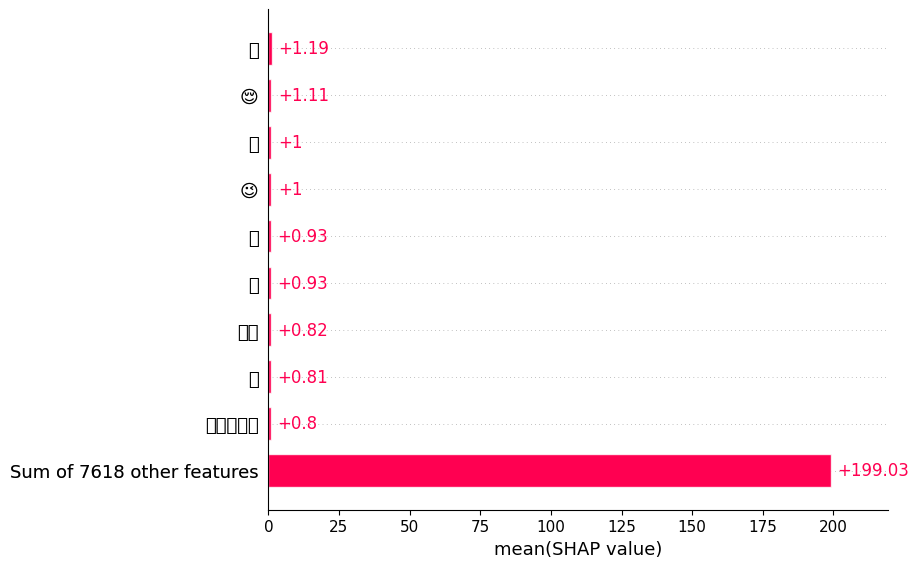

In [ ]:
shap.plots.bar(shap_values_ja[:,:,0].mean(0))